In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [101]:
#Loading the dataset
diabetes_data = pd.read_csv('C:/Users/alrsa/OneDrive/Desktop/samah/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
diabetes_data.shape

(768, 9)

In [7]:
diabetes_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:ylabel='Outcome'>

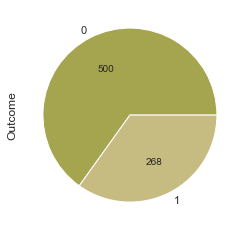

In [104]:
states = diabetes_data['Outcome'].value_counts()
colors = ['#e91e63','#59dce2','#1982bc','#4caf50']
colors = ['#a5a44f', '#c6bc82', '#a1d8aa', '#c85a41','#ffdd01','#6fa96f','#56accc','#c85a41']
states.plot.pie(autopct=lambda x: '{:.0f}'.format(x*states.sum()/100), colors = colors )

In [9]:
# proportion of diabetes patients (about 35% having diabetes)
diabetes_data.Outcome.value_counts()[1] / diabetes_data.Outcome.count()  #divid

0.3489583333333333

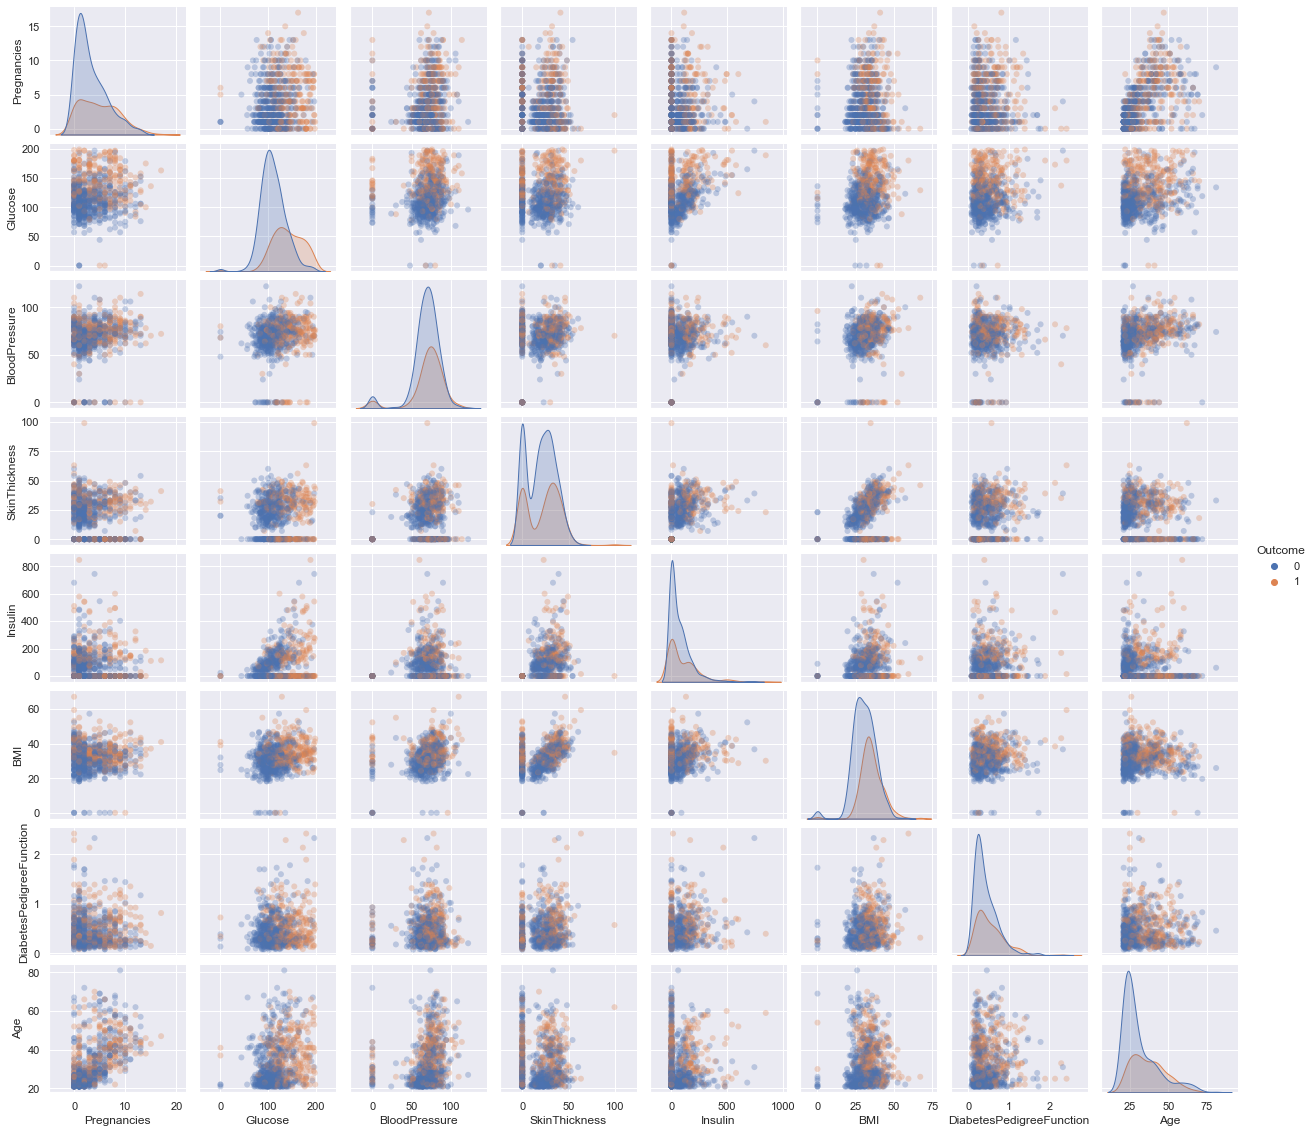

In [10]:
# to visualise pair plot
sns.pairplot(diabetes_data, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

In [107]:
corr=diabetes_data.corr()
corr.style.background_gradient(cmap='Greens')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


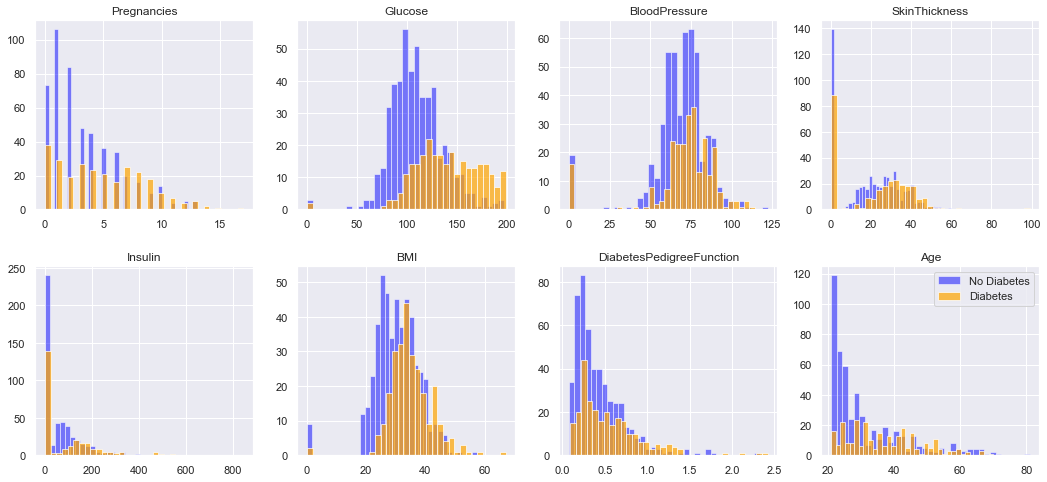

In [109]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes_data[diabetes_data.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes_data[diabetes_data.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

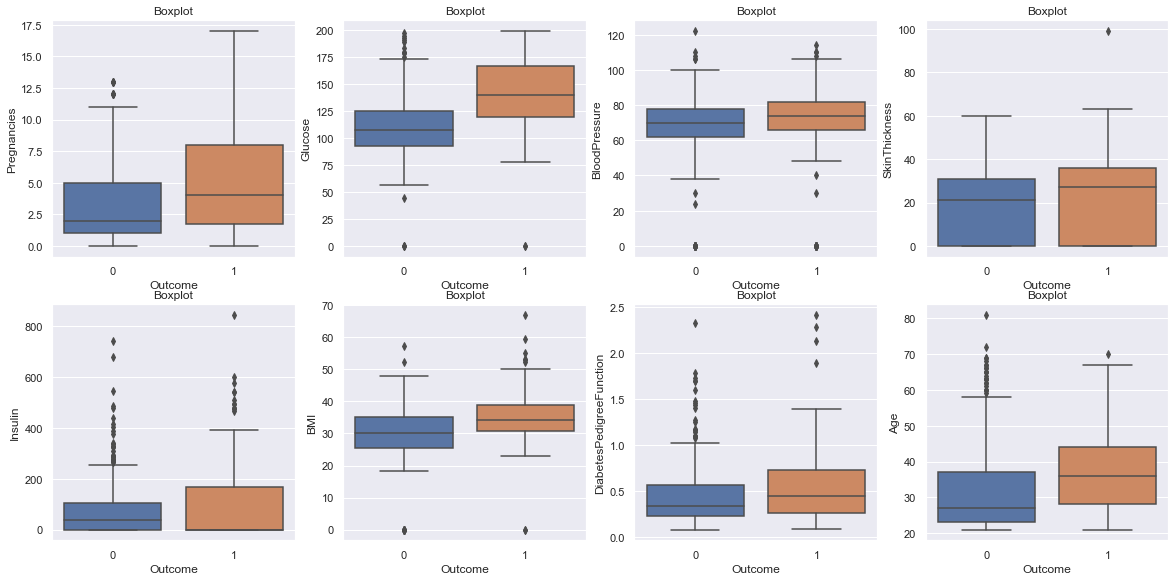

In [103]:
#Boxplots
plt.figure(figsize=(20,20))
plt.title("Visualization of class-oriented distribution of each feature using boxplot")
for column_index, column in enumerate(diabetes_data.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    plt.title("Boxplot")
    sns.boxplot(x='Outcome', y=column, data=diabetes_data)

In [14]:
X=diabetes_data.drop(['Outcome'],axis=1)
print(X.head(5))
print(X.shape)
y=diabetes_data['Outcome']
print(y.head(5))
print(X.shape)
print(y.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
(768, 8)
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
(768, 8)
(768,)


In [15]:
#data preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
modified_data=SelectKBest(score_func=chi2 ,k=5)
X_new=modified_data.fit_transform(X,y)
print(X.shape)
print(X_new.shape)

(768, 8)
(768, 5)


In [16]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [17]:
#split the data to train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2)

In [20]:
# log

log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(X_train,y_train)
print("Training:"+str(log_model.score(X_train,y_train)))
print("Test:"+str(log_model.score(X_test,y_test)))
log_predict = log_model.predict(X_test)
log_cm = confusion_matrix(y_test, log_predict)
log_score = log_model.best_score_

Training:0.7817589576547231
Test:0.6753246753246753


In [22]:
print("precision score : "+ str(precision_score(y_test,log_predict)))
print("accuray score : "+ str(accuracy_score(y_test,log_predict)))
print("recall score : "+ str(recall_score(y_test,log_predict)))
print("f1 score : "+ str(f1_score(y_test,log_predict)))

precision score : 0.7142857142857143
accuray score : 0.6753246753246753
recall score : 0.38461538461538464
f1 score : 0.5


In [21]:
# knn
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(X_train,y_train)
print("Training:"+str(knn_model.score(X_train,y_train)))
print("Test:"+str(knn_model.score(X_test,y_test)))
knn_predict = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_predict)
knn_score = knn_model.best_score_

Training:1.0
Test:0.6818181818181818


In [23]:
print("precision score : "+ str(precision_score(y_test,knn_predict)))
print("accuray score : "+ str(accuracy_score(y_test,knn_predict)))
print("recall score : "+ str(recall_score(y_test,knn_predict)))
print("f1 score : "+ str(f1_score(y_test,knn_predict)))

precision score : 0.7352941176470589
accuray score : 0.6818181818181818
recall score : 0.38461538461538464
f1 score : 0.5050505050505051


In [25]:
# svc
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(X_train,y_train)
print("Training:"+str(svc_model.score(X_train,y_train)))
print("Test:"+str(svc_model.score(X_test,y_test)))
svc_predict = svc_model.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_predict)
svc_score = svc_model.best_score_

Training:0.7850162866449512
Test:0.6753246753246753


In [26]:
print("precision score : "+ str(precision_score(y_test,svc_predict)))
print("accuray score : "+ str(accuracy_score(y_test,svc_predict)))
print("recall score : "+ str(recall_score(y_test,svc_predict)))
print("f1 score : "+ str(f1_score(y_test,svc_predict)))

precision score : 0.6923076923076923
accuray score : 0.6753246753246753
recall score : 0.4153846153846154
f1 score : 0.5192307692307692


In [28]:
# dt
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(X_train,y_train)
print("Training:"+str(dt_model.score(X_train,y_train)))
print("Test:"+str(dt_model.score(X_test,y_test)))
dt_predict = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_predict)
dt_score = dt_model.best_score_

Training:0.7866449511400652
Test:0.7077922077922078


In [29]:
print("precision score : "+ str(precision_score(y_test,dt_predict)))
print("accuray score : "+ str(accuracy_score(y_test,dt_predict)))
print("recall score : "+ str(recall_score(y_test,dt_predict)))
print("f1 score : "+ str(f1_score(y_test,dt_predict)))

precision score : 0.8125
accuray score : 0.7077922077922078
recall score : 0.4
f1 score : 0.5360824742268042


In [110]:
from sklearn.model_selection import cross_val_score

In [113]:
# rf
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(X_train,y_train)
print("Training:"+str(rf_model.score(X_train,y_train)))
print("Test:"+str(rf_model.score(X_test,y_test)))
rf_predict = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_predict)
rf_score = rf_model.best_score_

Training:0.8387622149837134
Test:0.6883116883116883


In [31]:
print("precision score : "+ str(precision_score(y_test,rf_predict)))
print("accuray score : "+ str(accuracy_score(y_test,rf_predict)))
print("recall score : "+ str(recall_score(y_test,rf_predict)))
print("f1 score : "+ str(f1_score(y_test,rf_predict)))

precision score : 0.75
accuray score : 0.7207792207792207
recall score : 0.5076923076923077
f1 score : 0.6055045871559633


In [33]:
# sgd
from sklearn.linear_model import SGDClassifier
sgd_params = {'loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty' : ['l2', 'l1', 'none']}
sgd_model = GridSearchCV(SGDClassifier(max_iter=10000), sgd_params, cv=5)
sgd_model.fit(X_train,y_train)
print("Training:"+str(sgd_model.score(X_train,y_train)))
print("Test:"+str(sgd_model.score(X_test,y_test)))
sgd_predict = sgd_model.predict(X_test)
sgd_cm = confusion_matrix(y_test, sgd_predict)
sgd_score = sgd_model.best_score_

Training:0.760586319218241
Test:0.7467532467532467


In [34]:
print("precision score : "+ str(precision_score(y_test,sgd_predict)))
print("accuray score : "+ str(accuracy_score(y_test,sgd_predict)))
print("recall score : "+ str(recall_score(y_test,sgd_predict)))
print("f1 score : "+ str(f1_score(y_test,sgd_predict)))

precision score : 0.76
accuray score : 0.7467532467532467
recall score : 0.5846153846153846
f1 score : 0.6608695652173914


In [45]:
# lgb
from lightgbm import LGBMClassifier

lgb_params = {'n_estimators': [5, 10, 15, 20, 25, 50, 100],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'num_leaves': [7, 15, 31],
                  }
lgb_model = LGBMClassifier()

lgb_model = GridSearchCV(LGBMClassifier(), lgb_params, cv=5)
lgb_model.fit(X_train,y_train)
print("Training:"+str(lgb_model.score(X_train,y_train)))
print("Test:"+str(lgb_model.score(X_test,y_test)))
lgb_predict = lgb_model.predict(X_test)
lgb_cm = confusion_matrix(y_test, lgb_predict)
lgb_score = lgb_model.best_score_

Training:0.8338762214983714
Test:0.7077922077922078


In [46]:
print("precision score : "+ str(precision_score(y_test,lgb_predict)))
print("accuray score : "+ str(accuracy_score(y_test,lgb_predict)))
print("recall score : "+ str(recall_score(y_test,lgb_predict)))
print("f1 score : "+ str(f1_score(y_test,lgb_predict)))

precision score : 0.717391304347826
accuray score : 0.7077922077922078
recall score : 0.5076923076923077
f1 score : 0.5945945945945945


In [51]:
# xgb
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]}
xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), xgb_params, cv=5)
xgb_model.fit(X_train,y_train)
print("Training:"+str(xgb_model.score(X_train,y_train)))
print("Test:"+str(xgb_model.score(X_test,y_test)))
xgb_predict = xgb_model.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_predict)
xgb_score = xgb_model.best_score_

Training:0.8892508143322475
Test:0.6883116883116883


In [52]:
print("precision score : "+ str(precision_score(y_test,xgb_predict)))
print("accuray score : "+ str(accuracy_score(y_test,xgb_predict)))
print("recall score : "+ str(recall_score(y_test,xgb_predict)))
print("f1 score : "+ str(f1_score(y_test,xgb_predict)))

precision score : 0.7073170731707317
accuray score : 0.6883116883116883
recall score : 0.4461538461538462
f1 score : 0.5471698113207548


In [64]:
# cb
from catboost import CatBoostClassifier

cb_params = {'learning_rate': [0.01, 0.05, 0.1],
             'depth': [3, 5, 7, 9]}
cb_model = CatBoostClassifier()

cb_model = GridSearchCV(CatBoostClassifier(verbose=False), cb_params, cv=5)
cb_model.fit(X_train,y_train)
print("Training:"+str(cb_model.score(X_train,y_train)))
print("Test:"+str(cb_model.score(X_test,y_test)))
cb_predict = cb_model.predict(X_test)
cb_cm = confusion_matrix(y_test, cb_predict)
cb_score = cb_model.best_score_

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Training:0.9087947882736156
Test:0.7077922077922078


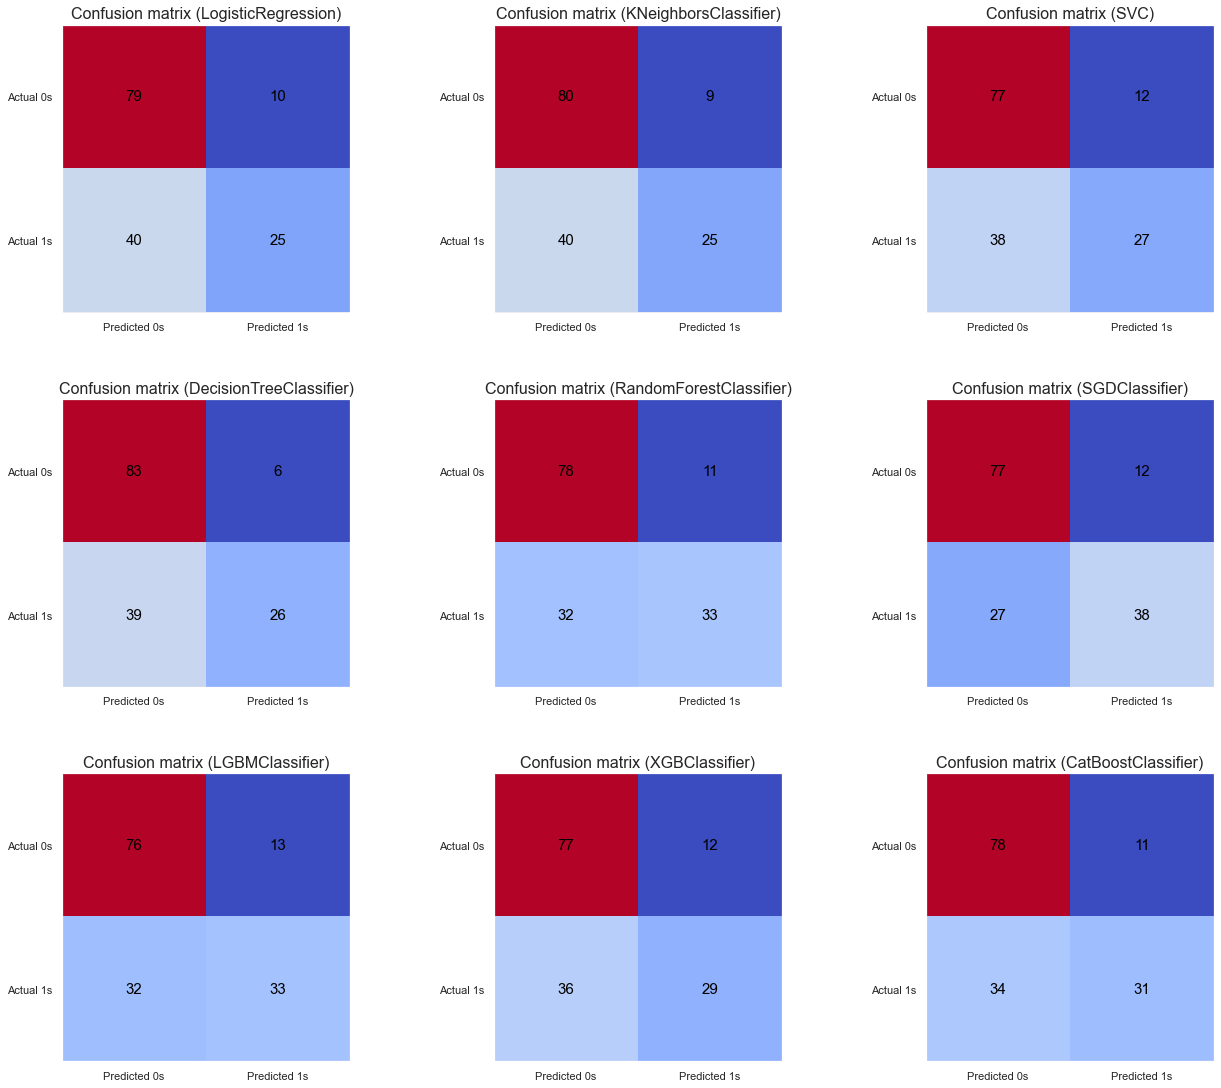

In [86]:

# Results

figure = plt.figure()
axes1 = figure.add_axes([0, 0, 1, 1]) # log_model
axes2 = figure.add_axes([1, 0, 1, 1]) # knn_model
axes3 = figure.add_axes([2, 0, 1, 1]) # svc_model
axes4 = figure.add_axes([0, -1.3, 1, 1]) # dt_model
axes5 = figure.add_axes([1, -1.3, 1, 1]) # rf_model
axes6 = figure.add_axes([2, -1.3, 1, 1]) # rf_model
axes7 = figure.add_axes([0, -2.6, 1, 1]) # lgb_model
axes8 = figure.add_axes([1, -2.6, 1, 1]) # xgb_model
axes9 = figure.add_axes([2, -2.6, 1, 1]) # xgb_model

# log_model
axes1.imshow(log_cm, cmap='coolwarm')
axes1.grid(False)
axes1.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes1.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes1.set_title('Confusion matrix (LogisticRegression)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes1.text(j, i, log_cm[i, j], ha='center', va='center', color='black',size =15)

# knn_model
axes2.imshow(knn_cm, cmap='coolwarm')
axes2.grid(False)
axes2.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes2.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes2.set_title('Confusion matrix (KNeighborsClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes2.text(j, i, knn_cm[i, j], ha='center', va='center', color='black',size =15)

# svc_model
axes3.imshow(svc_cm, cmap='coolwarm')
axes3.grid(False)
axes3.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes3.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes3.set_title('Confusion matrix (SVC)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes3.text(j, i, svc_cm[i, j], ha='center', va='center', color='black',size =15)

# knn_model       
axes4.imshow(dt_cm, cmap='coolwarm')
axes4.grid(False)
axes4.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes4.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes4.set_title('Confusion matrix (DecisionTreeClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes4.text(j, i, dt_cm[i, j], ha='center', va='center', color='black',size =15)

# rf_model       
axes5.imshow(rf_cm, cmap='coolwarm')
axes5.grid(False)
axes5.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes5.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes5.set_title('Confusion matrix (RandomForestClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes5.text(j, i, rf_cm[i, j], ha='center', va='center', color='black',size =15)
        
# sgd_model       
axes6.imshow(sgd_cm, cmap='coolwarm')
axes6.grid(False)
axes6.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes6.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes6.set_title('Confusion matrix (SGDClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes6.text(j, i, sgd_cm[i, j], ha='center', va='center', color='black',size =15)

# lgb_model       
axes7.imshow(lgb_cm, cmap='coolwarm')
axes7.grid(False)
axes7.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes7.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes7.set_title('Confusion matrix (LGBMClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes7.text(j, i, lgb_cm[i, j], ha='center', va='center', color='black',size =15)
        
# xgb_model       
axes8.imshow(xgb_cm, cmap='coolwarm')
axes8.grid(False)
axes8.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes8.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes8.set_title('Confusion matrix (XGBClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes8.text(j, i, xgb_cm[i, j], ha='center', va='center', color='black',size =15)

# cb_model       
axes9.imshow(cb_cm, cmap='coolwarm')
axes9.grid(False)
axes9.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes9.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes9.set_title('Confusion matrix (CatBoostClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes9.text(j, i, cb_cm[i, j], ha='center', va='center', color='black',size =15)

In [88]:

models = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 
          'RandomForestClassifier', 'SGDClassifier', 'LGBMClassifier', 'XGBClassifier', 'CatBoostClassifier']
scores = [log_score, knn_score, svc_score, dt_score, rf_score, sgd_score, lgb_score, xgb_score, cb_score]
score_table = pd.DataFrame({'Model':models, 'Score':scores})
score_table.sort_values(by='Score', axis=0, ascending=False)

,Model,Score
4,RandomForestClassifier,0.794749
2,SVC,0.786645
0,LogisticRegression,0.783380
8,CatBoostClassifier,0.783327
7,XGBClassifier,0.780075
6,LGBMClassifier,0.776929
3,DecisionTreeClassifier,0.775250
1,KNeighborsClassifier,0.775237
5,SGDClassifier,0.760562
